In [1]:
from matplotlib import pyplot as plt
from itertools import product
import seaborn as sns
import pandas as pd
import os.path as op
import argparse
import re
import numpy as np
import matplotlib.pyplot as plt
import mne
from bids import BIDSLayout
from statsmodels.stats.anova import AnovaRM
from util.io.ffr import *

In [2]:
def read_epochs(sub, desc):
    '''
    reads and concatenates epochs across runs
    '''
    from bids import BIDSLayout
    layout = BIDSLayout(BIDS_ROOT, derivatives = True)
    run = lambda f: int(re.findall('run-(\w+)_', f)[0])
    fnames = layout.get(
        return_type = 'filename',
        subject = sub, 
        desc = desc
        )
    print(fnames)
    fnames.sort(key = run)
    epochs_all = [mne.read_epochs(f) for f in fnames]
    epochs = mne.concatenate_epochs(epochs_all)
    epochs = epochs.pick('eeg')
    return epochs

def compute_power_dB(evokeds):
    poststim = evokeds.compute_psd(tmin = 0., tmax = 0.2)
    baseline = evokeds.compute_psd(tmin = -0.2, tmax = 0.)
    power = 10 * np.log10(poststim.get_data() / baseline.get_data())
    power = np.squeeze(power)
    freqs = poststim.freqs
    return freqs, power

In [3]:
# Look at FFR by target tone identity
BIDS_ROOT = '../data/bids'
layout = BIDSLayout(BIDS_ROOT, derivatives = True)
subs = layout.get_subjects(scope = 'preprocess_ffr')
subs.sort(key = int)
spectrums = []
conditions = ['100', '150', '200', '250', '50']

for sub in subs:
        
    # Read epochs object
    epochs = read_epochs(sub, 'forFFR')
    
    # Get evoked potentials
    evokeds = {c:epochs[c].average() for c in conditions}

    conditions = list(epochs.event_id.keys())

    # Iterate over conditions
    for condition in conditions:
        
        # Compute power in dB
        freqs, power = compute_power_dB(evokeds[condition])
        df = pd.DataFrame(
            {'subject': sub,
             'stimulus': condition,
             'frequency': freqs,
             'power': power
            }
        )
        spectrums.append(df)
    
# Create dataframe and save
spectrums = pd.concat(spectrums, ignore_index = True)
spectrums.to_csv('spectrums.csv', sep = '\t', index = False)

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-3/sub-3_task-pitch_run-1_desc-forFFR_epo.fif.gz', '/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-3/sub-3_task-pitch_run-2_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-3/sub-3_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
Not setting metadata
2355 matching events found
No baseline correction applied
0 projection items activated
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-3/sub-3_task-pitch_run-2_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
Not setting metadata
2283 matching events found
No baseline correction applied
0 projection items activ

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-5/sub-5_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-5/sub-5_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
Not setting metadata
3488 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3488 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Usi

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-6/sub-6_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-6/sub-6_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
Not setting metadata
4578 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4578 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Usi

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-7/sub-7_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-7/sub-7_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
Not setting metadata
4155 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4155 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Usi

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-8/sub-8_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-8/sub-8_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
Not setting metadata
4135 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4135 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Usi

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-9/sub-9_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-9/sub-9_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
Not setting metadata
1194 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1194 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
    Usi

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-10/sub-10_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-10/sub-10_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
Not setting metadata
4554 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4554 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
   

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-11/sub-11_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-11/sub-11_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
Not setting metadata
4651 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4651 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
   

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-12/sub-12_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-12/sub-12_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
Not setting metadata
4551 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4551 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
   

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-13/sub-13_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-13/sub-13_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
Not setting metadata
3839 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3839 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
   

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-14/sub-14_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-14/sub-14_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
Not setting metadata
4531 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4531 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
   

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-15/sub-15_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-15/sub-15_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
Not setting metadata
3401 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
3401 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
   

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-16/sub-16_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-16/sub-16_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
Not setting metadata
4449 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4449 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
   

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-17/sub-17_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-17/sub-17_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
Not setting metadata
4755 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4755 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
   

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-18/sub-18_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-18/sub-18_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
Not setting metadata
4556 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4556 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
   

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-19/sub-19_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-19/sub-19_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
Not setting metadata
4276 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4276 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
   

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-20/sub-20_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-20/sub-20_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
Not setting metadata
2851 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
2851 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
   

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


['/project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-21/sub-21_task-pitch_run-1_desc-forFFR_epo.fif.gz']
Reading /project2/hcn1/pitch_tracking/scripts/../data/bids/derivatives/preprocess_ffr/sub-21/sub-21_task-pitch_run-1_desc-forFFR_epo.fif.gz ...
    Found the data of interest:
        t =    -250.00 ...     250.00 ms
        0 CTF compensation matrices available
Not setting metadata
4112 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
4112 matching events found
Applying baseline correction (mode: mean)
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
   

/home/letitiayhho/.conda/envs/pitch-tracking/lib/python3.10/site-packages/bids/layout/validation.py:151: UserWarning: The PipelineDescription field was superseded by GeneratedBy in BIDS 1.4.0. You can use ``pybids upgrade`` to update your derivative dataset.
  warnings.warn("The PipelineDescription field was superseded "


KeyboardInterrupt: 

## Plots

#### First harmonic only

In [7]:
spectrums = pd.read_csv('spectrums.csv', sep = '\t')

(0.0, 350.0)

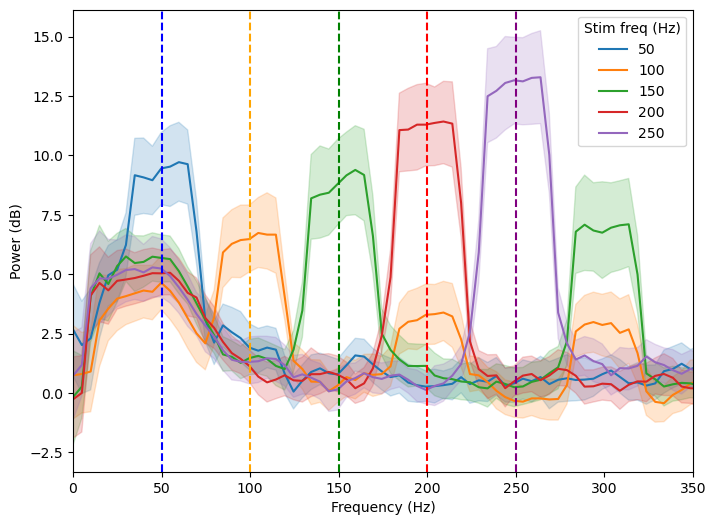

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
graph = sns.lineplot(data = spectrums, x = "frequency", y = "power", hue = "stimulus", palette = 'tab10', ax = ax)
graph.axvline(50, linestyle = 'dashed', color = 'blue')
graph.axvline(100, linestyle = 'dashed', color = 'orange')
graph.axvline(150, linestyle = 'dashed', color = 'green')
graph.axvline(200, linestyle = 'dashed', color = 'red')
graph.axvline(250, linestyle = 'dashed', color = 'purple')
graph.legend(title = 'Stim freq (Hz)')
graph.set_ylabel("Power (dB)")
graph.set_xlabel("Frequency (Hz)")
graph.set_xlim(0, 350)

#### First and second harmonic

Text(0.5, 0, 'Frequency (Hz)')

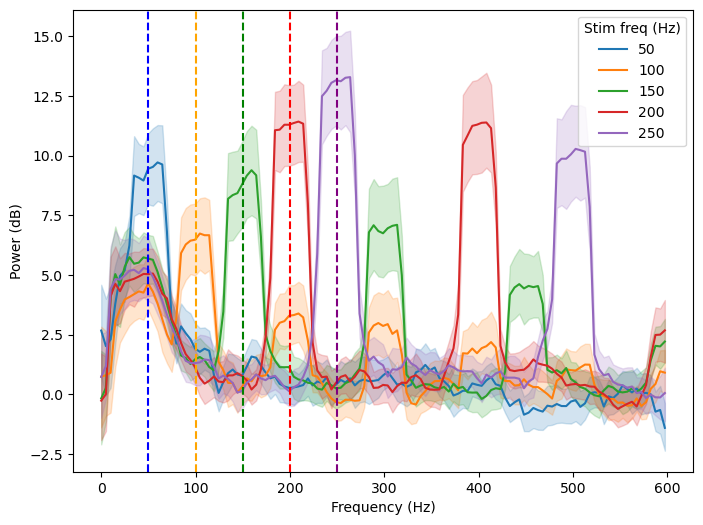

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
graph = sns.lineplot(data = spectrums, x = "frequency", y = "power", hue = "stimulus", palette = 'tab10', ax = ax)
graph.axvline(50, linestyle = 'dashed', color = 'blue')
graph.axvline(100, linestyle = 'dashed', color = 'orange')
graph.axvline(150, linestyle = 'dashed', color = 'green')
graph.axvline(200, linestyle = 'dashed', color = 'red')
graph.axvline(250, linestyle = 'dashed', color = 'purple')
graph.legend(title = 'Stim freq (Hz)')
graph.set_ylabel("Power (dB)")
graph.set_xlabel("Frequency (Hz)")

#### Power at each stim freq

In [4]:
stim_freqs = [50, 100, 150, 200, 250]
all_stims_power = []

for stim_freq in stim_freqs:
    
    idx = np.abs(spectrums.frequency - stim_freq).argmin()
    hz = spectrums.frequency[idx]
    power_f0 = spectrums[spectrums.frequency == hz]
    power_f0 = power_f0.groupby(['subject', 'stimulus'], as_index=False).mean()
    all_stims_power.append(power_f0)
    
all_stims_power = pd.concat(all_stims_power, ignore_index = False)
all_stims_power.to_csv('all_stims_power.csv', index = False)

[Text(0, 0, '50'),
 Text(1, 0, '100'),
 Text(2, 0, '150'),
 Text(3, 0, '200'),
 Text(4, 0, '250')]

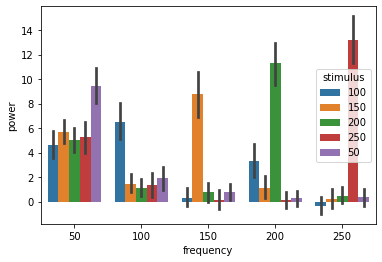

In [5]:
ax = sns.barplot(data = all_stims_power, x = 'frequency', y = "power", hue = 'stimulus')
ax.set_xticklabels(stim_freqs)

## Tests

In [7]:
aov = AnovaRM(
    data = all_stims_power, 
    depvar = 'power',
    subject = 'subject', 
    within = ['stimulus', 'frequency']
)
res = aov.fit()
print(res)

                      Anova
                   F Value  Num DF  Den DF  Pr > F
--------------------------------------------------
stimulus           10.1173  4.0000 156.0000 0.0000
frequency          37.1249  4.0000 156.0000 0.0000
stimulus:frequency 74.0936 16.0000 624.0000 0.0000



## Other plots

#### Time series

In [ ]:
files = glob.glob('../data/bids/derivatives/preprocess_ffr/sub-*/*fif.gz')
for file in files:
    sub_epochs = mne.read_epochs(file)
    epochs = mne.concatenate_epochs([epochs, sub_epochs])
    
# Compute grand average 
conditions = list(epochs.event_id.keys())
evokeds = {c:epochs[c].average() for c in conditions}

def spectrogram(x, fs, title):
    x = x.flatten()
    powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(x, Fs= fs)
    plt.title(title)
    plt.show()

# Plot
evokeds['50'].plot(titles = '50 Hz')
spectrogram(evokeds['50'].get_data(), fs, title = '50 Hz')
evokeds['100'].plot(titles = '100 Hz')
spectrogram(evokeds['100'].get_data(), fs, title = '100 Hz')
evokeds['150'].plot(titles = '150 Hz')
spectrogram(evokeds['150'].get_data(), fs, title = '150 Hz')
evokeds['200'].plot(titles = '200 Hz')
spectrogram(evokeds['200'].get_data(), fs, title = '200 Hz')
evokeds['250'].plot(titles = '250 Hz')
spectrogram(evokeds['250'].get_data(), fs, title = '250 Hz')
print('')

#### Spectrograms for each subject

In [ ]:
for sub in subs:
    sub_epochs = read_epochs(sub, 'forFFR')
    sub_evokeds = {}
    sub_evokeds['130'] = sub_epochs['11', '21', '31'].average()
    sub_evokeds['200'] = sub_epochs['12', '22', '32'].average()
    sub_evokeds['280'] = sub_epochs['31', '32', '33'].average()
    
    # PSD in dB
    freqs, power = compute_power_dB(sub_evokeds['130'])
    plot_psd_dB(freqs, power, 130)
    freqs, power = compute_power_dB(sub_evokeds['200'])
    plot_psd_dB(freqs, power, 200)
    freqs, power = compute_power_dB(sub_evokeds['280'])
    plot_psd_dB(freqs, power, 280)
    plt.show()
    
    # PSD with np.fft()
    freqs, ps, idx = compute_power_fft(fs, sub_evokeds['130'])
    plot_psd_fft(freqs, ps, idx, "130")
    freqs, ps, idx = compute_power_fft(fs, sub_evokeds['200'])
    plot_psd_fft(freqs, ps, idx, 200)
    freqs, ps, idx = compute_power_fft(fs, sub_evokeds['280'])
    plot_psd_fft(freqs, ps, idx, 280)
    plt.show()



#### Trial counts

In [ ]:
from bids import BIDSLayout
from util.io.iter_BIDSPaths import *
import pandas as pd

In [ ]:
BIDS_ROOT = '../data/bids'
layout = BIDSLayout(BIDS_ROOT, derivatives = True)
fpaths = layout.get(scope = 'preprocess_ffr',
                suffix='epo',
                extension = 'fif.gz',
                return_type = 'filename')

trials_50 = []
trials_100 = []
trials_150 = []
trials_200 = []
trials_250 = []
subs = []
    
for (fpath, sub, task, run) in iter_BIDSPaths(fpaths):
    subs.append(sub)
    sub_epochs = mne.read_epochs(fpath)
    trials_50.append(len(sub_epochs['50']))
    trials_100.append(len(sub_epochs['100']))
    trials_150.append(len(sub_epochs['150']))
    trials_200.append(len(sub_epochs['200']))
    trials_250.append(len(sub_epochs['250']))